<a href="https://colab.research.google.com/github/kashish-lang/Yulu-Bike-Demand-Analysis-Statistical-Exploration-of-Micro-Mobility-Trends/blob/main/yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 ) Define Problem Statement and perform Exploratory Data Analysis

1.1 Definition of problem (as per given problem statement with additional views)

Yulu, a leading micro mobility service provider in India, has experienced a significant decline in its revenue. The company aims to identify the key factors influencing the demand for its shared electric cycles in the Indian market. The goal is to cover actionable insights that can help yulu to boost usage, optimize operations and drive customer retention.

1.2 Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv

--2025-05-08 08:49:14--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.238.59.71, 18.238.59.211, 18.238.59.132, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.238.59.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv’

bike_sharing.csv    100%[===================>] 633.16K  --.-KB/s    in 0.04s   

2025-05-08 08:49:14 (15.9 MB/s) - ‘bike_sharing.csv’ saved [648353/648353]



In [ ]:
from google.colab import files
files.download('bike_sharing.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
file_path = os.path.join(os.getcwd(), 'bike_sharing.csv')
df = pd.read_csv(file_path)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [ ]:
df.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df[df.duplicated()].shape

(0, 12)

In [ ]:
df['count'].describe()

,count
count,10886.000000
mean,191.574132
std,181.144454
min,1.000000
25%,42.000000
50%,145.000000
75%,284.000000
max,977.000000


In [ ]:
df['temp'].describe()

,temp
count,10886.00000
mean,20.23086
std,7.79159
min,0.82000
25%,13.94000
50%,20.50000
75%,26.24000
max,41.00000


In [ ]:
df['atemp'].describe()

,atemp
count,10886.000000
mean,23.655084
std,8.474601
min,0.760000
25%,16.665000
50%,24.240000
75%,31.060000
max,45.455000


In [ ]:
df['windspeed'].describe()

,windspeed
count,10886.000000
mean,12.799395
std,8.164537
min,0.000000
25%,7.001500
50%,12.998000
75%,16.997900
max,56.996900


In [ ]:
df['humidity'].describe()

,humidity
count,10886.000000
mean,61.886460
std,19.245033
min,0.000000
25%,47.000000
50%,62.000000
75%,77.000000
max,100.000000


In [ ]:
df['casual'].describe()

,casual
count,10886.000000
mean,36.021955
std,49.960477
min,0.000000
25%,4.000000
50%,17.000000
75%,49.000000
max,367.000000


In [ ]:
df['registered'].describe()

,registered
count,10886.000000
mean,155.552177
std,151.039033
min,0.000000
25%,36.000000
50%,118.000000
75%,222.000000
max,886.000000


In [ ]:
df['season'].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2686


In [ ]:
df.groupby(df['season'])['count'].nunique()

,count
season,
1,446
2,665
3,662
4,619


In [ ]:
df.groupby(df['season'])['count'].describe().T

season,1,2,3,4
count,2686.000000,2733.000000,2733.000000,2734.000000
mean,116.343261,215.251372,234.417124,198.988296
std,125.273974,192.007843,197.151001,177.622409
min,1.000000,1.000000,1.000000,1.000000
25%,24.000000,49.000000,68.000000,51.000000
50%,78.000000,172.000000,195.000000,161.000000
75%,164.000000,321.000000,347.000000,294.000000
max,801.000000,873.000000,977.000000,948.000000


1.3 Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

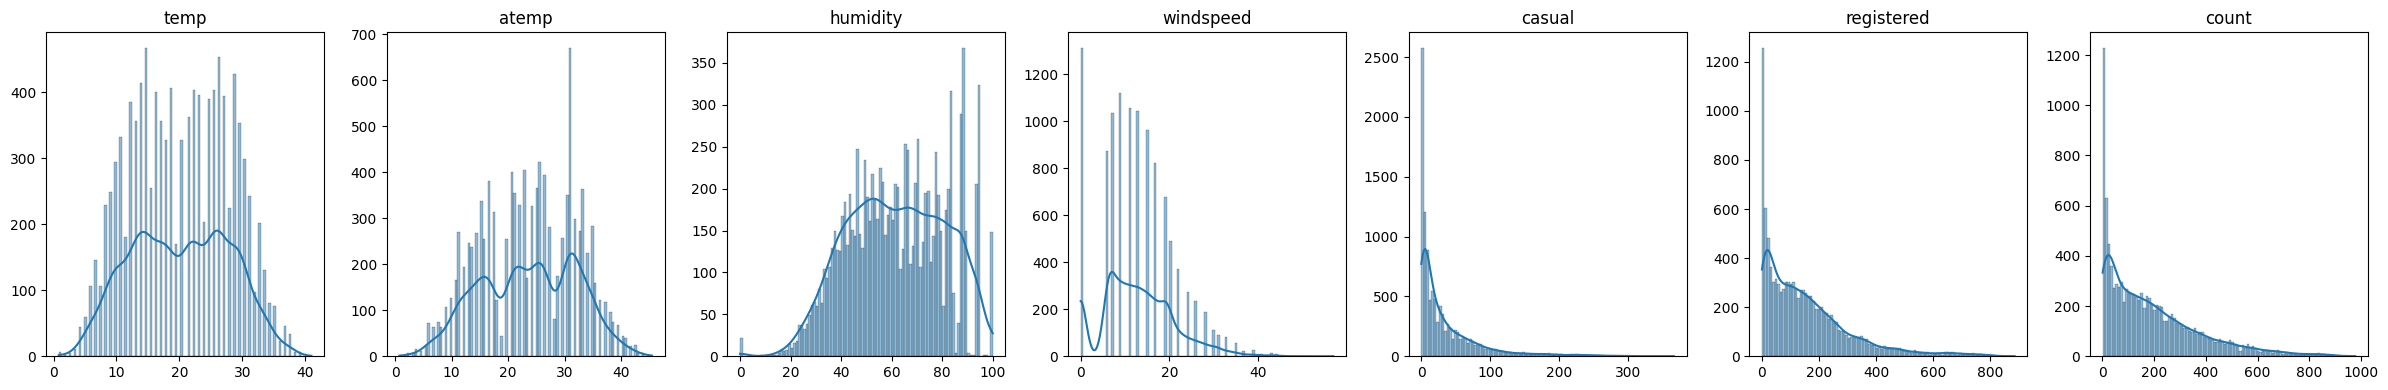

In [ ]:
# Distribution plot for continuous variables
continuous_variables = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_variables), figsize=(24, 4))
for i, col in enumerate(continuous_variables):
    sns.histplot(df[col], bins=100, ax=axes[i], kde=True)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
categorical_variables = ['season', 'holiday', 'workingday', 'weather']
for col in categorical_variables:
  df[col] = df[col].astype('category')

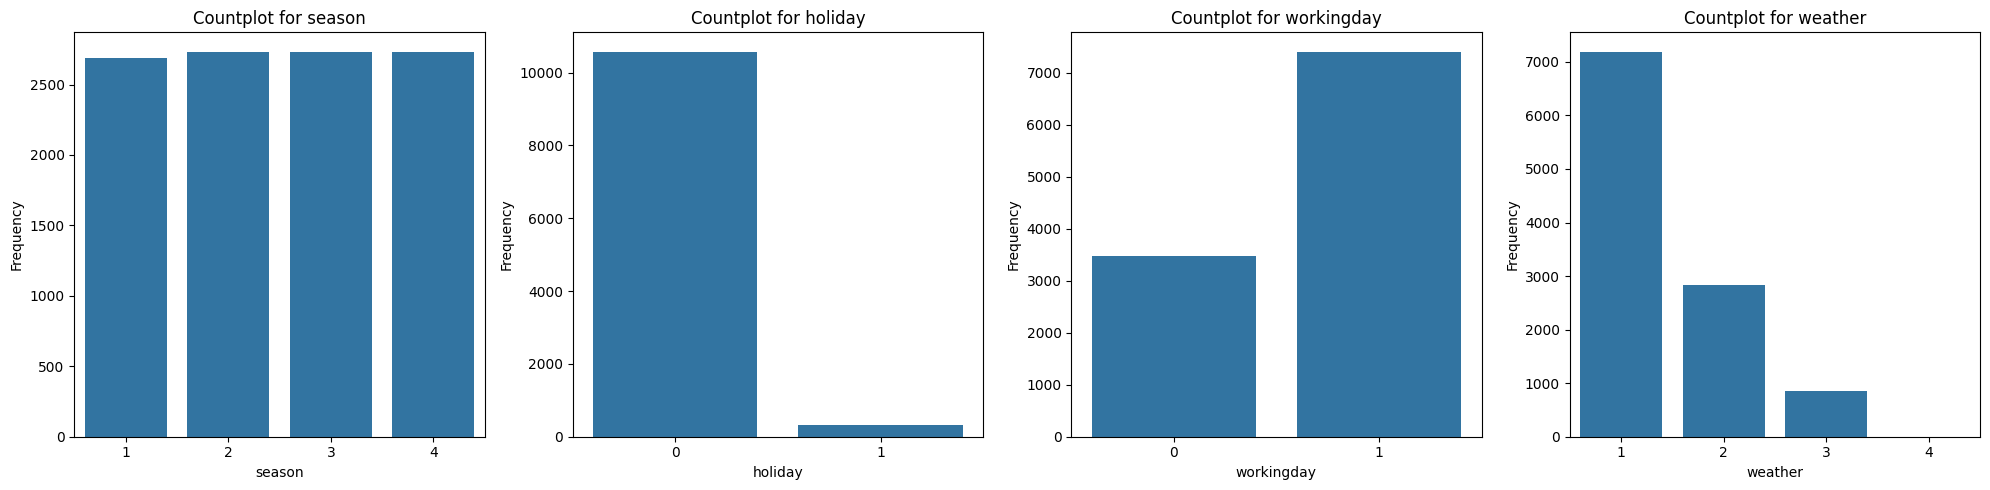

In [ ]:
# Barplots / Countplots for categorical variables
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_variables), figsize=(20, 5))
for i, col in enumerate(categorical_variables):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Countplot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

1.4 Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.

<Axes: xlabel='workingday', ylabel='registered'>

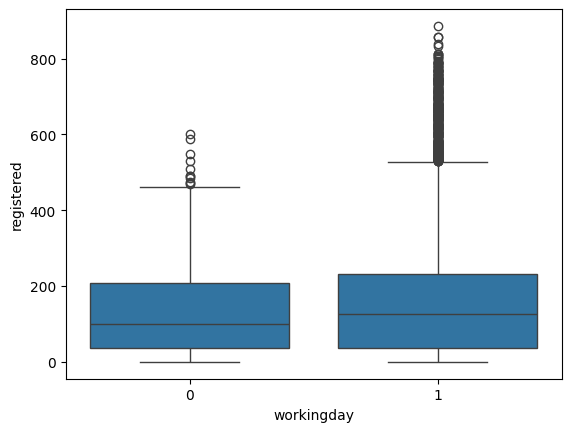

In [ ]:
# working day vs registered users
sns.boxplot(x=df['workingday'], y=df['registered'])

<Axes: xlabel='workingday', ylabel='casual'>

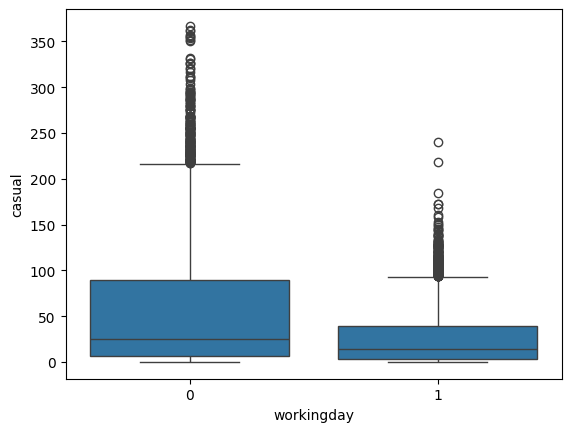

In [ ]:
# working day vs casual
sns.boxplot(x=df['workingday'], y=df['casual'])

<Axes: xlabel='workingday', ylabel='count'>

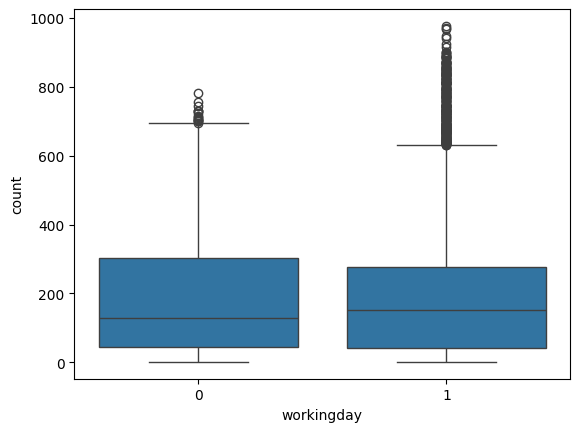

In [ ]:
# working day vs count
sns.boxplot(x=df['workingday'], y=df['count'])

<Axes: xlabel='season', ylabel='count'>

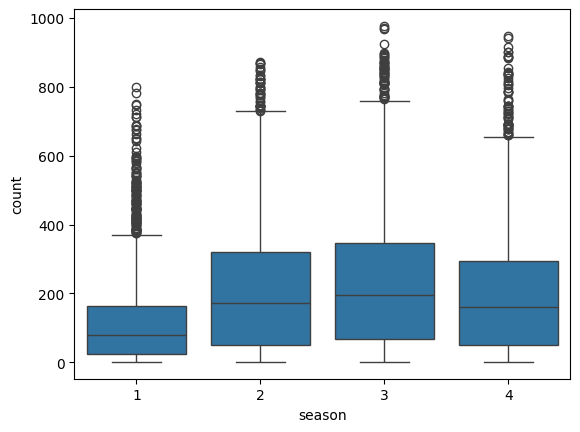

In [ ]:
# season vs count
sns.boxplot(x=df['season'], y=df['count'])

<Axes: xlabel='weather', ylabel='count'>

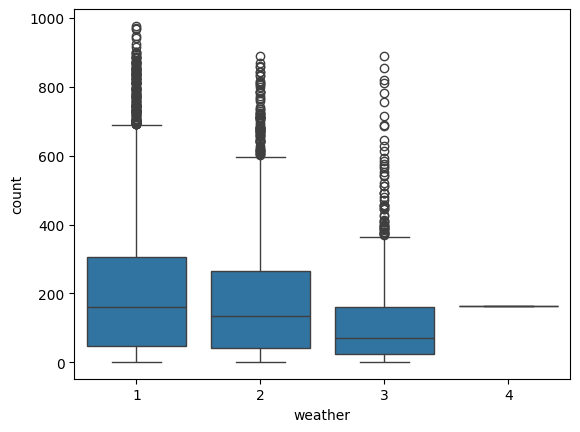

In [ ]:
# whether vs count
sns.boxplot(x=df['weather'], y=df['count'])

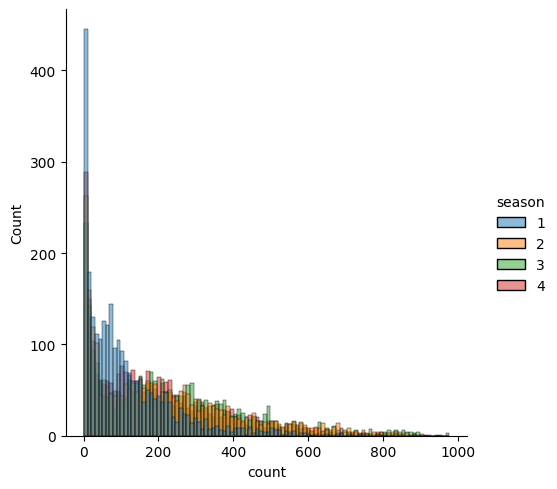

In [ ]:
sns.displot(x=df['count'], bins=100, hue=df['season'])

In [ ]:
df.groupby(df['season'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


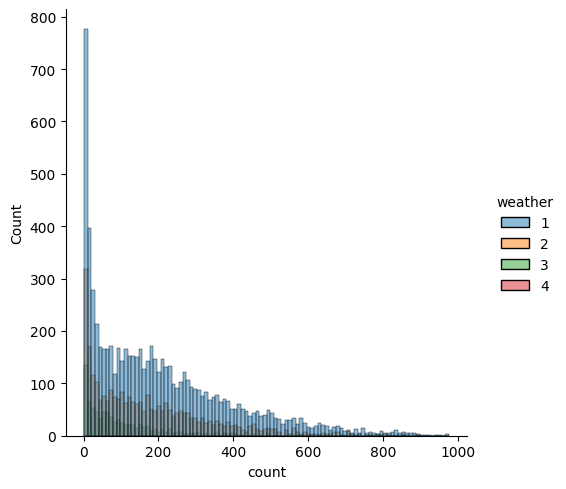

In [ ]:
sns.displot(x=df['count'], bins=100, hue=df['weather'])

In [ ]:
df.groupby(df['season'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


<Axes: >

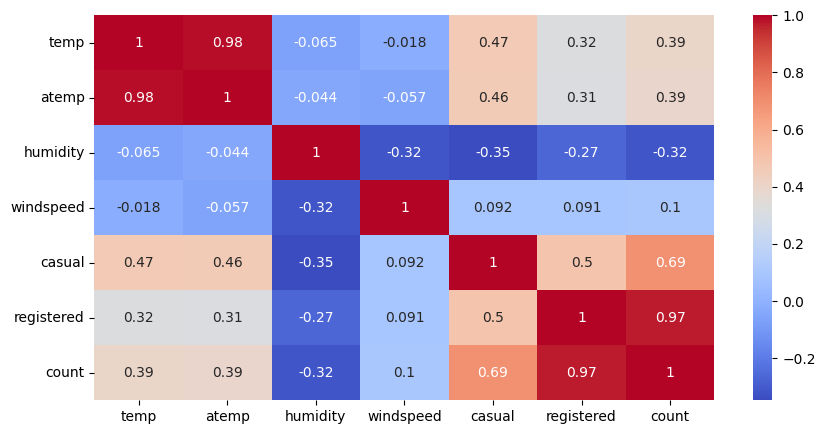

In [ ]:
# correlation heatmap for continuous variables
plt.figure(figsize=(10,5))
sns.heatmap(df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr(), annot=True, cmap='coolwarm')

In [ ]:
# convert datetime column to proper date time format
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['dayofweek'] = df['datetime'].dt.dayofweek

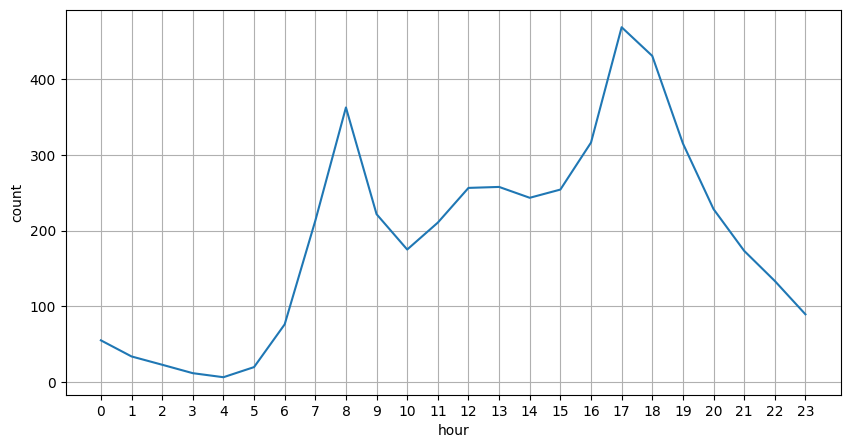

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df, x = 'hour', y = 'count', ci=None, estimator=np.mean)
plt.xticks(range(0,24))
plt.grid(True)

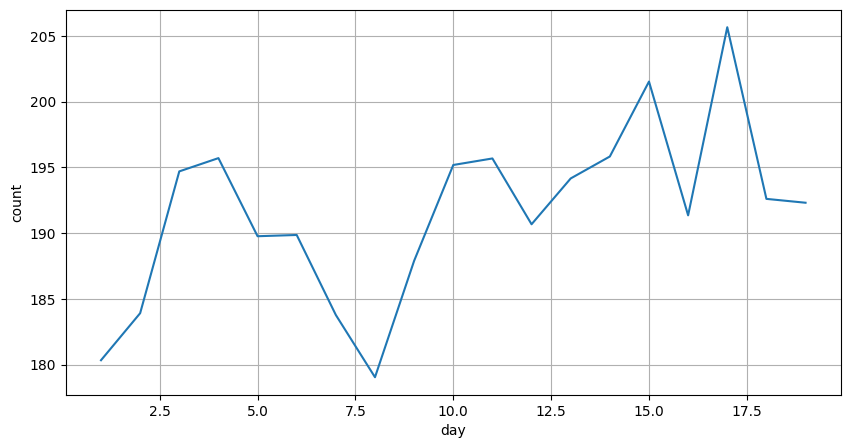

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df, x = 'day', y = 'count', ci=None, estimator=np.mean)
plt.grid(True)

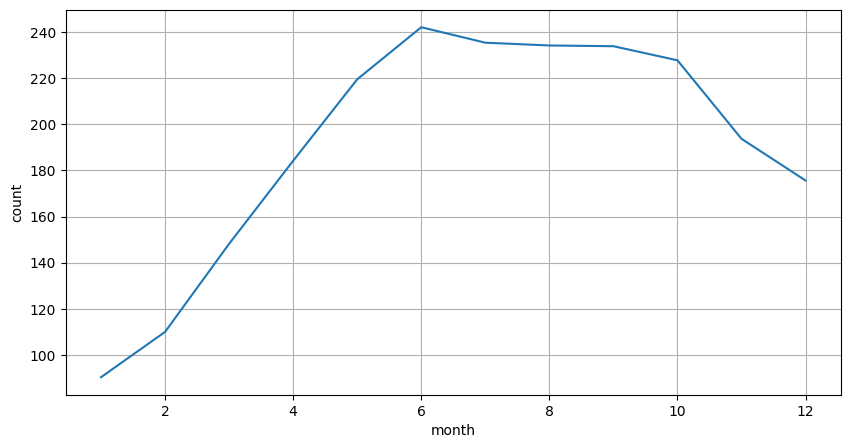

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df, x = 'month', y = 'count', ci=None, estimator=np.mean)
plt.grid(True)

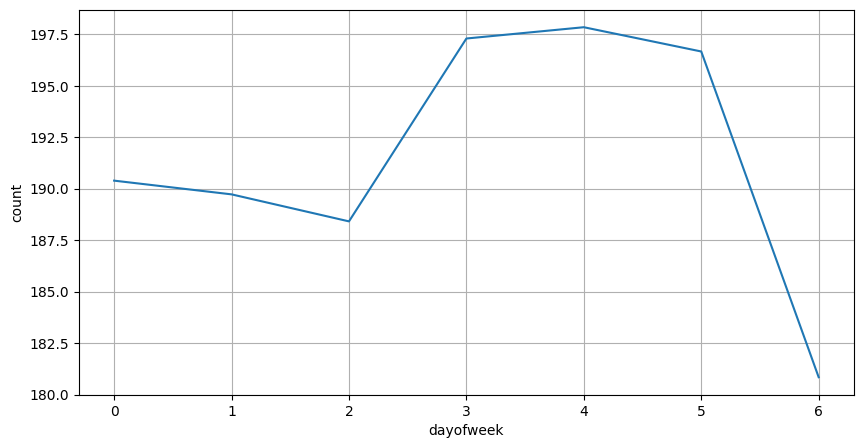

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df, x = 'dayofweek', y = 'count', ci=None, estimator=np.mean)
plt.grid(True)

1.5 Illustrate the insights based on EDA

Comments on range of attributes, outliers of various attributes
- temp : ranges form 0.82 to 42, here difference between mean and median is very very less (means there are no or very few outliers)
- atemp : ranges form 0.76 to 45.455, here difference between mean and median is less (means there are very few outliers)
- humidity : ranges from 0 to 100, here difference between mean and median is very very less (means there is only 1 or 2 outliers)
- windspeed : ranges from 0 to 56.99, here difference between mean and median is very very less (means there are no or very few outliers)
- casual : ranges grom 0 to 367,  there are so many outliers present in the casual column
- registered : ranges from 0 to 886, a huge difference between mean and median (means there so many outliers present in it)
- count : ranges from 1 to 977

Comments on the distribution of the variables and relationship between them
- workingday vs count : Working days show significantly higher ride counts,specially by registered users. Casual rides drop on working days.
- season vs count : Peak demand in summer and fall, dips in winter and spring.
- weather vs count : Clear weather yields high usage. Rides drop in rain.

Comments for each univariate and bivariate plots
- Univariate plots
    - temp, atemp : roughly normal distribution, centered around 20 to 30
    - humidity : left skewed, most data points are on right side
    - windspeed : roughly right skewed
    - casual, registered, count : right skewed, most of the users lies < 200, few peak values
    - season : Uniformed distribution, all seasons are well-represented
    - holiday : Imbalanced, most days are not holidays
    - workingday : Balanced, slightly more working days
    - weather : Imbalanced, majority of days are clear weather type '1'

- Bivariate plots
    - Workingday vs count
        - Higher count is typically seen on working days due to office commute.
        - Casual users may ride more on non-working days.
    - Season vs count
        - Count may dip in spring and winter.
        - Peak usage often seen in summer and fall.
    - Weather vs count
        - Clear weather (weather=1) sees the highest demand
        - Count drops drastically as weather worsens (rain)

# 2 ) Hypothesis Testing

2.1 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

Null Hypothesis (H₀):
There is no difference in the average bike rental count between working days and non-working days.

Alternative Hypothesis (H₁):
There is a difference in the average bike rental count between working days and non-working days.

<Axes: xlabel='workingday', ylabel='count'>

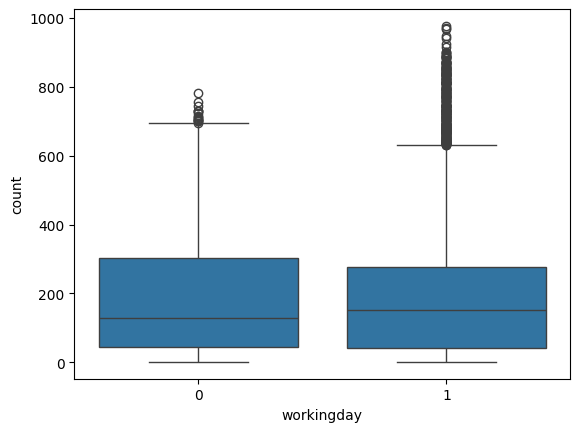

In [ ]:
sns.boxplot(x=df['workingday'], y=df['count'])

Boxplot showing the distribution of cycle rentals (`count`) across different groups (working day vs non-working day).


In [ ]:
from scipy.stats import ttest_ind
tstat, pvalue = ttest_ind(df[df['workingday']==1]['count'], df[df['workingday']==0]['count'], equal_var=False)

In [ ]:
print(tstat, pvalue)

1.2362580418223226 0.21640312280695098


In [ ]:
alpha = 0.05 # for 95% confidence
if pvalue < alpha:
  print('Reject null hypothesis')
  print('There is a difference in the average bike rental count between working days and non-working days.')
else:
  print('Fail to reject null hypothesis')
  print('There is no difference in the average bike rental count between working days and non-working days.')

Fail to reject null hypothesis
There is no difference in the average bike rental count between working days and non-working days.


2.2 ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season

- For weather

H₀: The mean rental count is the same across all weather conditions.

H₁: At least one weather condition has a different mean rental count.

In [ ]:
from scipy.stats import f_oneway
weather_1 = df[df['weather']==1]['count']
weather_2 = df[df['weather']==2]['count']
weather_3 = df[df['weather']==3]['count']
weqther_4 = df[df['weather']==4]['count']
fstat, pvalue = f_oneway(weather_1, weather_2, weather_3, weqther_4)

In [ ]:
print(fstat, pvalue)

65.53024112793271 5.482069475935669e-42


In [ ]:
alpha = 0.05 # for 95% confidence interval
if pvalue < alpha:
  print('Reject null hypothesis')
  print('No. of cycles rented is different in different weather conditions.')
else:
  print('Fail to reject null hypothesis')
  print('No. of cycles rented is similar in different weather conditions.')

Reject null hypothesis
No. of cycles rented is different in different weather conditions.


- For Season:

H₀: The mean rental count is the same across all seasons.

H₁: At least one season has a different mean rental count.

In [ ]:
season_1 = df[df['season']==1]['count']
season_2 = df[df['season']==2]['count']
season_3 = df[df['season']==3]['count']
season_4 = df[df['season']==4]['count']
fstat, pvalue = f_oneway(season_1, season_2, season_3, season_4)

In [ ]:
print(fstat, pvalue)

236.94671081032106 6.164843386499654e-149


In [ ]:
alpha = 0.05 # for 95% confidence level
if pvalue < alpha:
  print('Reject null hypothesis')
  print('No. of cycles rented is different in different seasons.')
else:
  print('Fail to reject null hypothesis')
  print('No. of cycles rented is similar in different seasons.')

Reject null hypothesis
No. of cycles rented is different in different seasons.


2.3 Chi-square test to check if Weather is dependent on the season

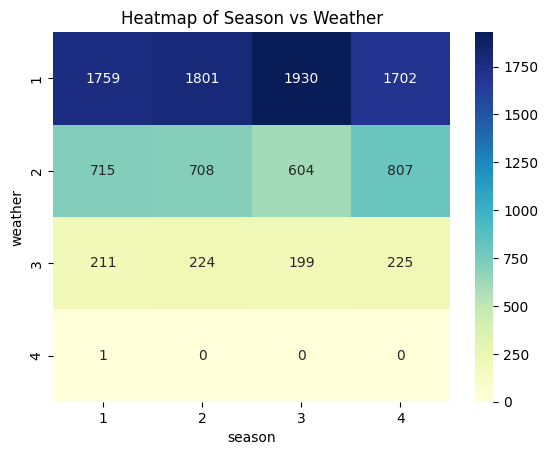

In [ ]:
contingency_table = pd.crosstab(df['weather'], df['season'])  # Define contingency_table before using it
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Season vs Weather")
plt.show()

Null Hypothesis (H₀):
Weather and season are independent (no association).

Alternative Hypothesis (H₁):
Weather and season are dependent (there is an association).

In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['weather'], df['season'])
chi2, pvalue, dof, expected = chi2_contingency(contingency_table)

In [ ]:
print(chi2, pvalue)

49.15865559689363 1.5499250736864862e-07


In [ ]:
alpha = 0.05 # for 95% confidence interval
if pvalue < alpha:
  print('Reject null hypothesis')
  print('Weather and season are dependent (there is an association).')
else:
  print('Fail to reject null hypothesis')
  print('Weather and season are independent (no association).')

Reject null hypothesis
Weather and season are dependent (there is an association).


 Selected Statistical Test

We used a **[t-test / One-Way ANOVA / Chi-square test]** based on the nature of the variables:
- The dependent variable (`count`) is continuous.
- The independent variable ([workingday, season, weather]) is categorical.



# Final insights and recommandation

**Insights from the analysis**

1) working days vs non-working days
  - A significant difference in cycle rental counts was observed between working and non-working days.
  - Rentals tend to be **higher on working days**, indicating strong usage for daily commuting.


2) Impact of season
  - One-way ANOVA showed that the **season has a statistically significant effect** on rental counts.
  - Peak rentals were observed during summer and fall, suggesting seasonal trends in user demand.


3) Impact of weather
  - Weather also showed a significant effect on rentals.
  - Poor weather (heavy rain) correlates with **lower rental activity**.


4) Chi-square test : weather vs season
  - A statistically significant association was found between **weather and season**, which aligns with expected seasonal weather patterns.

  
5) Distribution observations
  - Variables such as `temp`, `atemp`, and `humidity` are generally normally distributed.
  - No severe outliers found in `count`, but moderate variance in extreme weather conditions.
  - `casual` and `registered` riders show different behavioral trends; casual riders rent more on holidays and weekends.


**Recommandations for Yulu**

1. **Dynamic Pricing & Availability Based on Season**
   - Increase fleet availability and marketing in **peak seasons** and reduce in low-demand periods to optimize costs.

2. **Promotions for Off-Days**
   - Consider offering **discounts on non-working days or holidays** to increase casual user engagement.

3. **Weather-Aware Fleet Planning**
   - Use **weather forecasts to adjust fleet deployment** dynamically (e.g., reduce fleet in bad weather to cut maintenance and idle costs).

4. **Target Office-Goers**
   - Since working days see more rentals, **partner with corporate parks or metro stations** to add Yulu Zones and offer B2B plans.

5. **Improve App Personalization**
   - Based on seasonality and user history, show **personalized commute suggestions and reminders** to increase retention.
